### ✍ В предыдущем юните мы познакомились с различными вариациями градиентного спуска. Но для того чтобы наш арсенал методов был более полным и позволял решать самые разные задачи, нам необходимо разобраться и с рядом других алгоритмов. В этом юните мы будем изучать **метод Ньютона**.

Метод Ньютона используется во многих алгоритмах машинного обучения. Часто в литературе его сравнивают с градиентным спуском, так как два этих алгоритма очень популярны. Вы уже сталкивались с методом Ньютона, но не знали об этом.

В документации для функции LogisticRegression из библиотеки scikit-learn представлено пять вариантов алгоритмов оптимизации, которые можно использовать при обучении модели:

+ 'newton-cg';
+ 'lbfgs';
+ 'liblinear';
+ 'sag';
+ 'saga'.

Последние два являются вариациями стохастического градиентного спуска (а значит вам уже понятен принцип их работы), а с первыми тремя нам только предстоит познакомиться. В этом юните мы рассмотрим алгоритм 'newton-cg', в следующем — 'lbfgs', а в седьмом юните — 'liblinear'. Вы будете понимать суть всех методов, представленных в самой популярной библиотеке для машинного обучения, и выбирать подходящий, исходя из особенностей поставленной задачи.

Начнём с метода Ньютона. Этот алгоритм работает быстрее, чем градиентный спуск, и тратит меньше времени для достижения минимума, однако у него есть и определённые недостатки, о которых мы поговорим позже.

## Метод Ньютона изначально появился как метод решения уравнений вида $f(x) = 0$.

Проиллюстрируем принцип его работы геометрически. Пусть у нас есть график некоторой функции. Проведём к нему касательную в точке $x_n$.

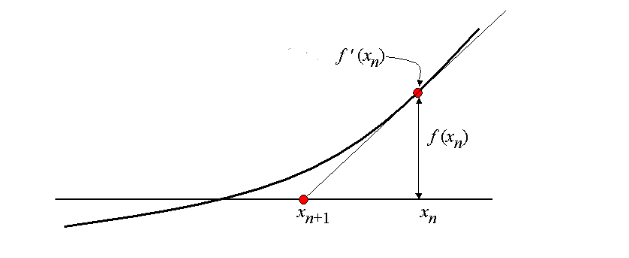

Тогда эта касательная имеет наклон, равный $f'(x_n)$, и проходит через точку $x_n, f(x_n)$. В таком случае мы можем сказать, что уравнение этой касательной: $y = f'(x_n)(x-x_n) + f(x_n)$.

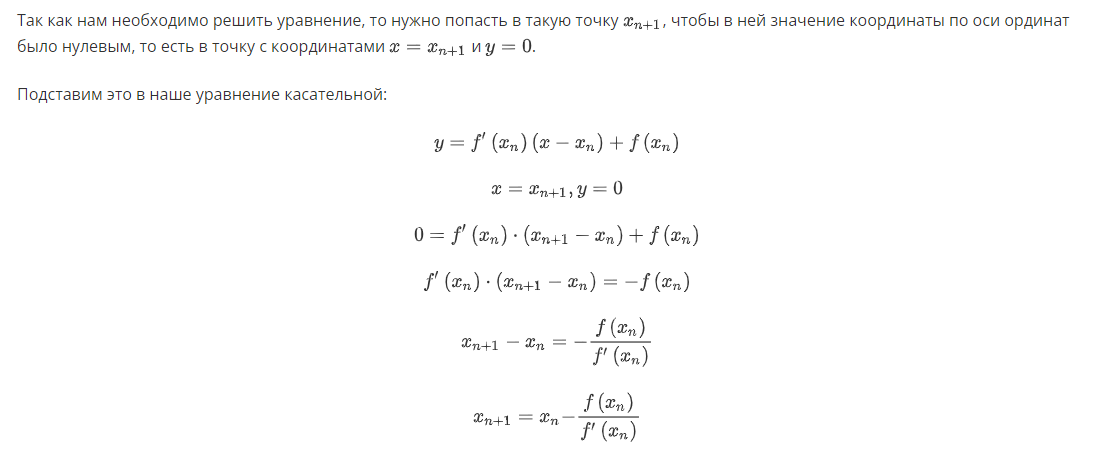

Можно посмотреть на это и в анимации:

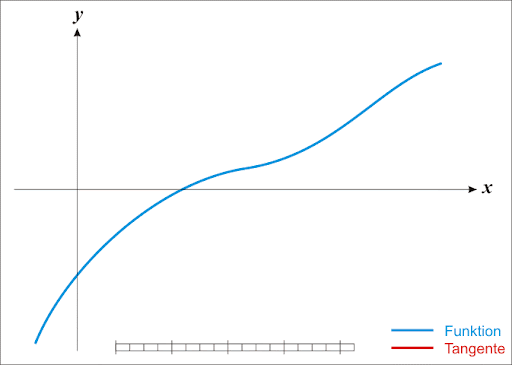

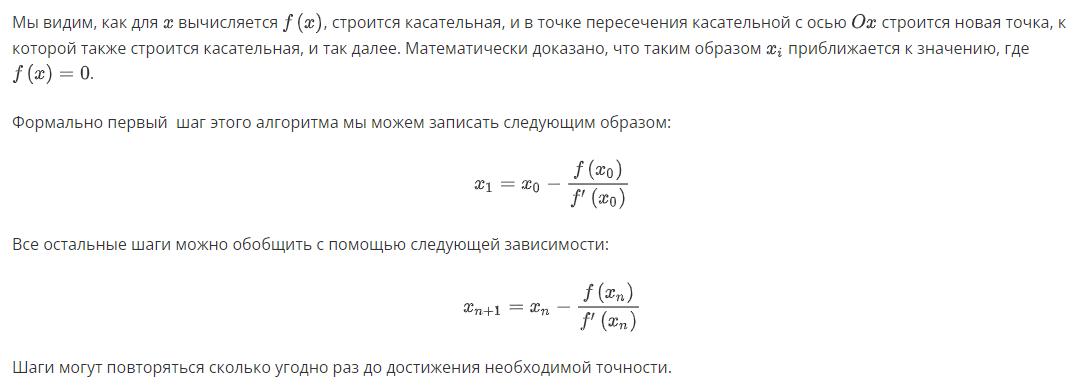

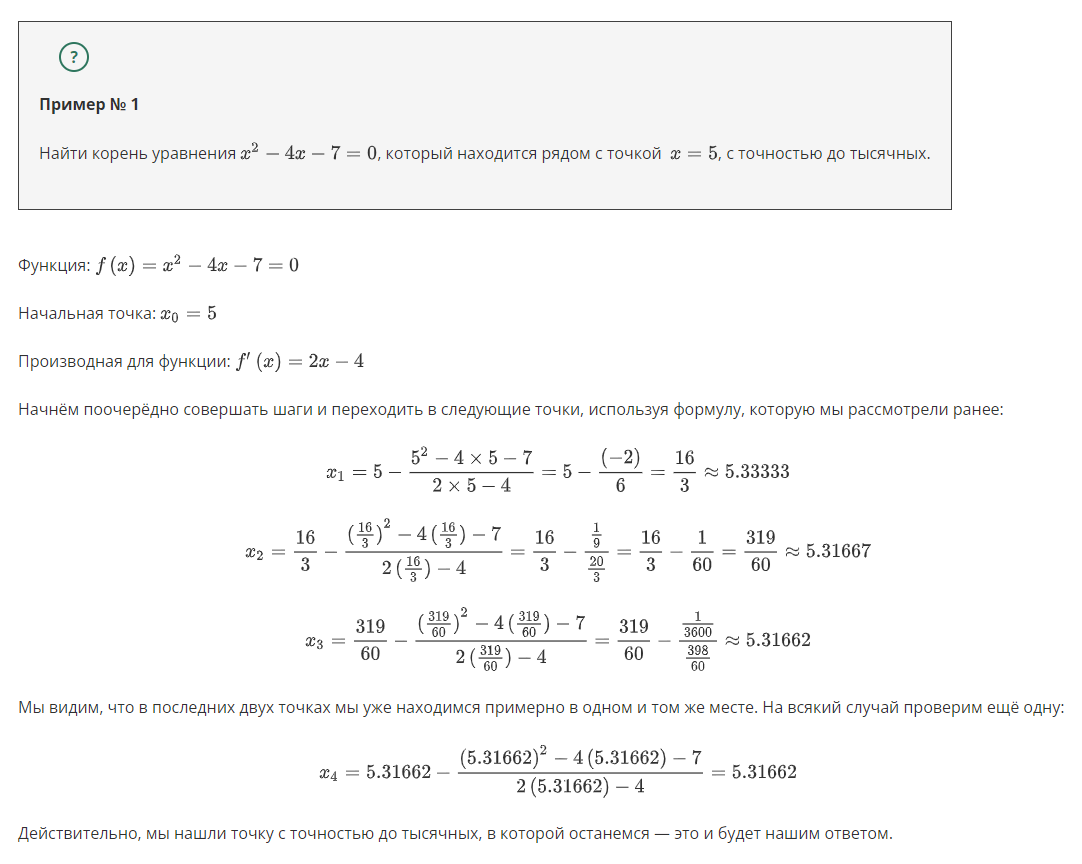

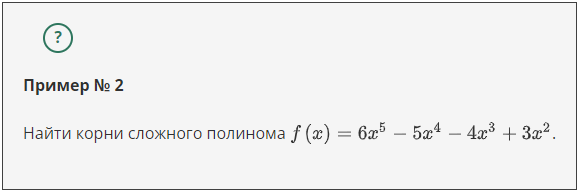

Как мы знаем, к сожалению, для полинома пятой степени нет формулы поиска корней, поэтому будем использовать численные методы. В этих случаях приходится прибегать к числовому линейному приближению.

Ниже представлен график нашего полинома. У него три корня: в точках 0, 1 и где-то между ними. Как найти третий корень?

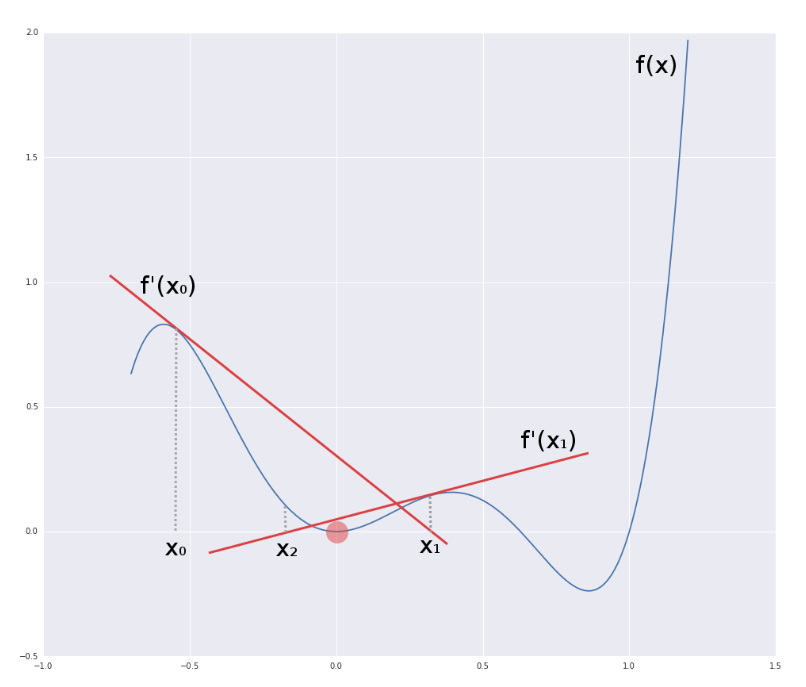

В методе Ньютона мы берём случайную точку $x_0$, а затем проводим касательную в ней. Точка $x_1$, где эта касательная пересекает ось абсцисс, станет нашим следующим предположением. Так что теперь мы  строим уже касательную в этой точке, и так далее . Мы продолжаем до тех пор, пока не достигнем необходимой точности. В целом, мы можем сделать приближение настолько близким к нулю, насколько хотим.

In [1]:
def func1(x):
    return 6*x**5-5*x**4-4*x**3+3*x**2
 
def func2(x):
    return 30*x**4-20*x**3-12*x**2+6*x
init_value = 0.7
iter_count = 0
x_curr = init_value
epsilon = 0.000001
f = func1(x_curr)
 
while (abs(f) > epsilon):
    f = func1(x_curr)
    f_prime = func2(x_curr)
    x_curr = x_curr - (f)/(f_prime)
    iter_count += 1
    print(x_curr)
print(iter_count)

0.6296335078534031
0.6286680781673306
0.6286669787778999
0.6286669787764609
4


Отлично, мы научились искать приближённые значения для корней уравнения. Но как же это поможет нам найти минимум или максимум для функции?

Дело в том, что в задаче оптимизации можно решать не $f(x) = 0$, а $f'(x) = 0$ — тогда мы найдём потенциальные точки экстремума.

В многомерном случае по аналогичным рассуждениям производная превращается в градиент, а вторая производная превращается в гессиан (матрица вторых производных или, как мы её называли в предыдущем модуле, матрица Гессе). Поэтому в формуле появится обратная матрица.

Для многомерного случая формула выглядит следующим образом:

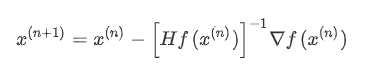

Можно заметить, что эта формула совпадает с формулой для градиентного спуска, но вместо умножения на learning rate (темп обучения) используется умножение на обратную матрицу к гессиану. Благодаря этому функция может сходиться за меньшее количество итераций, так как мы учитываем информацию о выпуклости функции через гессиан. Можно увидеть это на иллюстрации работы двух методов, где метод Ньютона явно сходится быстрее:

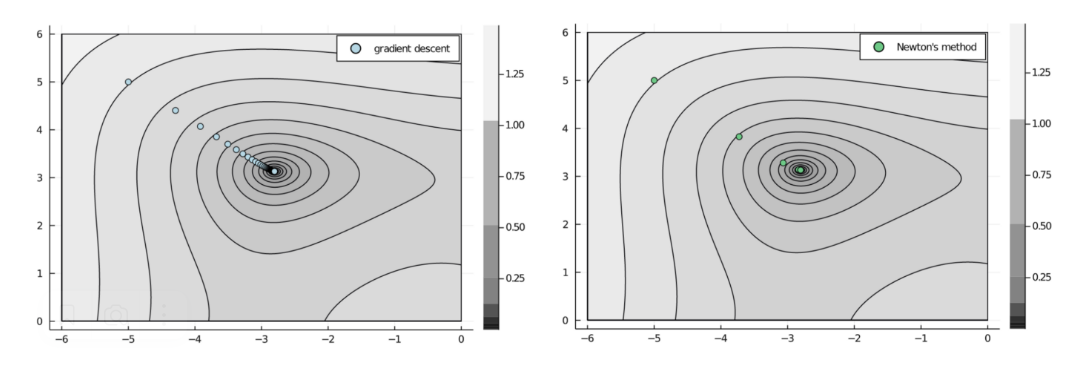

Метод Ньютона, если считать в количестве итераций, в многомерном случае (с гессианом) работает быстрее градиентного спуска.

## Задание 3.2

Методом какого порядка является метод Ньютона?

+ Второго


Выше мы уже разобрали применение метода Ньютона для поиска корней уравнения. Теперь давайте снова используем его, но уже для оптимизации функции ↓

Оптимизировать функцию $f(x) = x^3 - 3x^2 - 45x + 40$

Находим производную функции:

$f'(x) = 3x^2 - 6x - 45$

Находим вторую производную:

$f''(x) = 6x - 6$

Сразу определим их в Python, чтобы можно было параллельно решить задачу и с помощью программирования:

In [2]:
def func1(x):
    return 3*x**2 - 6*x -45
def func2(x):
    return 6*x - 6

Теперь необходимо взять какую-нибудь изначальную точку. Например, пусть это будет точка $x = 42$. Также нам необходима точность — её возьмем равной 0.0001. На каждом шаге будем переходить в следующую точку по уже упомянутой выше формуле:

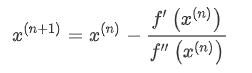

Например, в нашем случае следующая после 42 точка будет рассчитываться следующим образом:

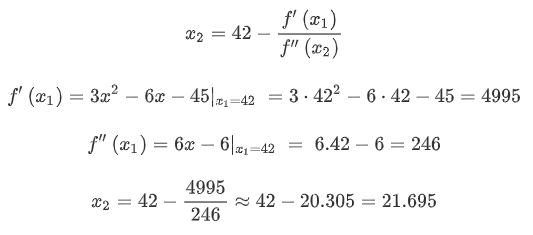

Третья точка будет вычисляться по аналогичному принципу:

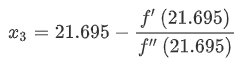

Но, к счастью, нам совсем не обязательно высчитывать всё вручную — воспользуемся Python и распишем наш алгоритм:

In [3]:
initial_value = 42
iter_count = 0
x_curr = initial_value
epsilon = 0.0001
f = func1(x_curr)

while (abs(f) > epsilon):
    f = func1(x_curr)
    f_prime = func2(x_curr)
    x_curr = x_curr - (f)/(f_prime)
    iter_count += 1
    print(x_curr)

21.695121951219512
11.734125501243229
7.1123493600499685
5.365000391507974
5.015260627016227
5.000029000201801
5.000000000105126
5.0


Можно объединить всё в одну функцию:

In [10]:
from scipy import optimize

In [15]:
def newtons_method(f, der, eps, init):
    iter_count = 0
    x_curr = init
    f = f(x_curr)
    while (abs(f) > eps):
        f = f(x_curr)
        f_der = der(x_curr)
        x_curr = x_curr - (f)/(f_prime)
        iter_count += 1
    return x_curr
 
from scipy.optimize import newton
newton(func=func1,x0=50,fprime=func2, tol=0.0001)

0.1666666666668869

## **У метода Ньютона есть ряд достоинств и недостатков.**

### ДОСТОИНСТВА:

+ Если мы минимизируем квадратичную функцию, то с помощью метода Ньютона можно попасть в минимум целевой функции за один шаг.

+ Также этот алгоритм сходится за один шаг, если в качестве минимизируемой функции выступает функция из класса поверхностей вращения (т. е. такая, у которой есть симметрия).

+ Для несимметричной функции метод не может обеспечить сходимость, однако скорость сходимости  всё равно превышает скорость методов, основанных на градиентном спуске.

### НЕДОСТАТКИ:

+ Этот метод очень чувствителен к изначальным условиям.

При использовании градиентного спуска мы всегда гарантированно движемся по антиградиенту в сторону минимума. В методе Ньютона происходит подгонка параболоида к локальной кривизне, и затем алгоритм движется к неподвижной точке данного параболоида. Из-за этого мы можем попасть в максимум или седловую точку. Особенно ярко это видно на невыпуклых функциях с большим количеством переменных, так как у таких функций седловые точки встречаются намного чаще экстремумов.

Поэтому здесь необходимо обозначить ограничение: метод Ньютона стоит применять только для задач, в которых целевая функция выпуклая.

Впрочем, это не является проблемой. В линейной регрессии или при решении задачи классификации с помощью метода опорных векторов или логистической регрессии мы как раз ищем минимум у выпуклой целевой функции, то есть данный алгоритм подходит нам во многих случаях.

+ Также метод Ньютона может быть затратным с точки зрения вычислительной сложности, так как требует вычисления не только градиента, но и гессиана и обратного гессиана (при делении на матрицу необходимо искать обратную матрицу).

Если у задачи много параметров, то расходы на память и время вычислений становятся астрономическими. Например, при наличии 50 параметров нужно вычислять более 1000 значений на каждом шаге, а затем предстоит ещё более 500 операций нахождения обратной матрицы. Однако метод всё равно используют, так как выгода от быстрой сходимости перевешивает затраты на вычисления.

Несмотря на его ограниченное практическое применение, метод Ньютона по-прежнему представляет большую ценность. Он имеет большое преимущество перед градиентным спуском в силу своей быстроты и отсутствия необходимости в настройке гиперпараметра шага (мы помним, что в градиентном спуске выбор шага — довольно непростая задача, а здесь можно обойтись без этого). Причём преимущество в быстроте очень ощутимое: в сравнении на реальных данных метод Ньютона находит решение задачи за 3 итерации, а градиентный спуск — за 489. То есть мы сильно выигрываем в скорости сходимости, а для анализа данных это очень важно, ведь экономия времени и вычислительных ресурсов позволяет решать задачи быстрее.


Мы увидели, какой эффективной может быть оптимизация второго порядка при правильном использовании. Но что, если бы мы могли каким-то образом использовать эффективность, полученную при использовании производных второго порядка, но при этом избежать вычислительных затрат на вычисление обратного гессиана? Другими словами — можем ли мы создать алгоритм, который будет своего рода гибридом между градиентным спуском и методом Ньютона, где мы сможем получать более быструю сходимость, чем градиентный спуск, но меньшие вычислительные затраты на каждую итерацию, чем в методе Ньютона?

Оказывается, такой алгоритм существует. Точнее, целый класс таких методов оптимизации, называемых квазиньютоновскими методами. Мы познакомимся с ними уже в следующем юните, но для начала давайте закрепим пройденный материал ↓

## Задание 3.7

In [12]:
def func1(x):
    return x**2 + 9*x - 5
 
def func2(x):
    return 2*x + 9
init_value = 2.2
iter_count = 0
x_curr = init_value
epsilon = 0.000001
f = func1(x_curr)
 
while (abs(f) > epsilon):
    f = func1(x_curr)
    f_prime = func2(x_curr)
    x_curr = x_curr - (f)/(f_prime)
    iter_count += 1
    print(x_curr)
print(iter_count)


0.7343283582089555
0.5291259698087832
0.5249395544696249
0.5249378105607477
0.5249378105604451
5


## Задание 3.8

Для минимизации каких функций лучше всего подходит метод Ньютона?

+ Выпуклых

## Задание 3.9

In [14]:
def func(x):
    return 8*x**3-2*x**2-450
def func1(x):
    return 24*x**2 - 4*x 
def func2(x):
    return 48*x -4
 
init_value = 42
iter_count = 0
x_curr = init_value
epsilon = 0.0001
f = func1(x_curr)
 
while (abs(f) > epsilon):
    f = func1(x_curr)
    f_prime = func2(x_curr)
    x_curr = x_curr - (f)/(f_prime)
    iter_count += 1
    print(x_curr)
 
print(round(x_curr, 3))
print(round(func(x_curr),3))

21.041749502982107
10.562707090133793
5.323351550447383
2.7040050774153417
1.3949941413301903
0.7418109325525483
0.41784523900811205
0.26096925221473555
0.19169814030401197
0.16955770984744145
0.1667151339969682
0.1666666807529666
0.16666666666666785
0.167
-450.019
